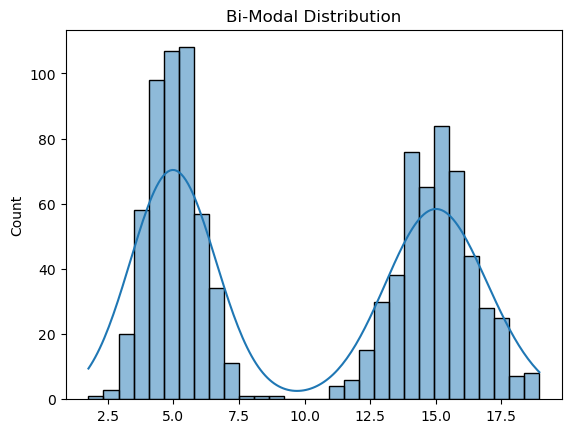

(array(['High', 'Low', 'Medium'], dtype='<U6'), array([334, 334, 332]))


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

# Simulate bi-modal data
np.random.seed(42)
data1 = np.random.normal(loc=5, scale=1, size=500)
data2 = np.random.normal(loc=15, scale=1.5, size=500)
data = np.concatenate([data1, data2])

# Plot the distribution
sns.histplot(data, bins=30, kde=True)
plt.title("Bi-Modal Distribution")
plt.show()

# Equal-frequency binning
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
binned_data = kbd.fit_transform(data.reshape(-1, 1))

# Add bin labels
bin_labels = ["Low", "Medium", "High"]
labeled_bins = [bin_labels[int(bin_val)] for bin_val in binned_data.flatten()]

# Display results
print(np.unique(labeled_bins, return_counts=True))


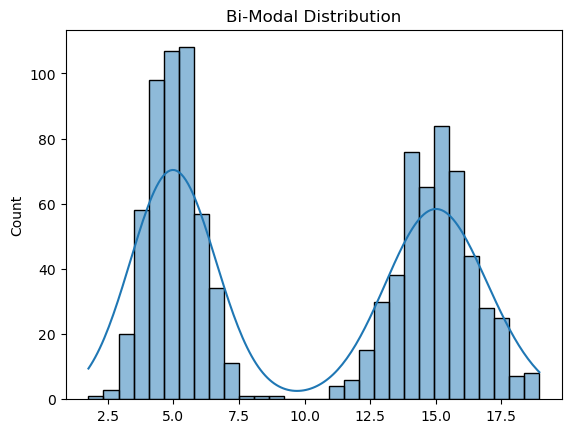

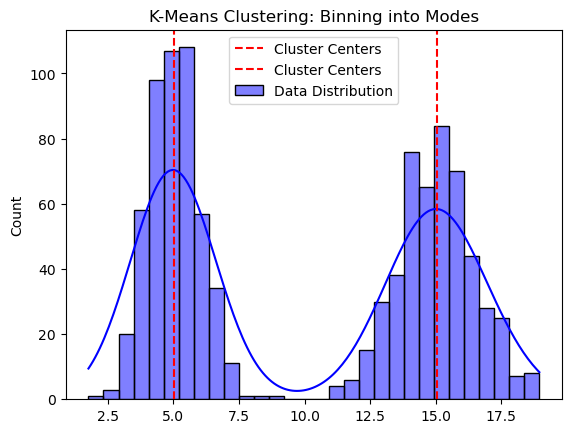

Bin Distribution (Mode 1 vs Mode 2):
Counter({'Mode 1': 500, 'Mode 2': 500})


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Step 1: Generate bi-modal data for demonstration
np.random.seed(42)
data1 = np.random.normal(loc=5, scale=1, size=500)  # Mode 1
data2 = np.random.normal(loc=15, scale=1.5, size=500)  # Mode 2
data = np.concatenate([data1, data2])

# Step 2: Visualize the distribution of data (bi-modal)
sns.histplot(data, bins=30, kde=True)
plt.title("Bi-Modal Distribution")
plt.show()

# Step 3: Apply K-Means clustering to the data
# We assume that there are 2 clusters (bi-modal distribution)
kmeans = KMeans(n_clusters=2, random_state=42)

# Reshape data for KMeans (from 1D to 2D)
data_reshaped = data.reshape(-1, 1)

# Fit the model
kmeans.fit(data_reshaped)

# Step 4: Assign data points to clusters
labels = kmeans.predict(data_reshaped)

# Step 5: Assign meaningful bin labels based on cluster assignments
bin_labels = ["Mode 1", "Mode 2"]

# Map cluster labels to bin labels
labeled_bins = [bin_labels[label] for label in labels]

# Step 6: Visualize the clusters
sns.histplot(data, bins=30, kde=True, color='blue', label="Data Distribution")
for cluster_center in kmeans.cluster_centers_:
    plt.axvline(cluster_center, color='red', linestyle='dashed', label="Cluster Centers")
plt.legend()
plt.title("K-Means Clustering: Binning into Modes")
plt.show()

# Step 7: Display the results
# Print the count of data points in each bin
from collections import Counter
print("Bin Distribution (Mode 1 vs Mode 2):")
print(Counter(labeled_bins))


In [8]:
from scipy import stats
import numpy as np

# Generate left-skewed data
data = np.random.beta(a=0.5, b=1, size=1000)

# Apply Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(data + 1)  # add 1 if your data has 0s or negatives

# Check skewness before and after
print("Original Skewness:", stats.skew(data))
print("Transformed Skewness:", stats.skew(transformed_data))


Original Skewness: 0.5988522474861991
Transformed Skewness: 0.1263674654827601


In [9]:
from sklearn.preprocessing import PowerTransformer

# Generate left-skewed data
data = np.random.beta(a=0.5, b=1, size=1000)

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(data.reshape(-1, 1))

# Check skewness before and after
print("Original Skewness:", stats.skew(data))
print("Transformed Skewness:", stats.skew(transformed_data))


Original Skewness: 0.5902065399112558
Transformed Skewness: [0.12496615]


In [10]:
import numpy as np

# Apply exponential transformation
transformed_data = np.exp(data)  # Apply exp transformation

# Check skewness before and after
print("Original Skewness:", stats.skew(data))
print("Transformed Skewness:", stats.skew(transformed_data))


Original Skewness: 0.5902065399112558
Transformed Skewness: 0.9296306079094063
